## Modified from Fraud_detection_starter

# Data Prep

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter("ignore")

## Read the Data

In [2]:
client_train = pd.read_csv("data/train/client_train.csv", low_memory=False)
invoice_train = pd.read_csv("data/train/invoice_train.csv", low_memory=False)

client_test = pd.read_csv("data/test/client_test.csv", low_memory=False)
invoice_test = pd.read_csv("data/test/invoice_test.csv", low_memory=False)
sample_submission = pd.read_csv("data/SampleSubmission.csv", low_memory=False)

## Data Understanding

In [3]:
# compare size of the various datasets
print(client_train.shape, invoice_train.shape, client_test.shape, invoice_train.shape)

(135493, 6) (4476749, 16) (58069, 5) (4476749, 16)


In [4]:
# print top rows of dataset
invoice_train.head(50)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


In [5]:
# print top rows of dataset
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [6]:
# Get a summary for all numerical columns
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [7]:
# Get a summary for all numerical columns
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [8]:
# Get concise information of each column in dataset
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [9]:
# Get concise information of each column in dataset
client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [10]:
# Getting unique values on the invoice train data
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 12
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [11]:
# Getting unique values on the invoice train data
for col in client_train.columns:
    print(f"{col} - {client_train[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


In [12]:
# check for missing values
invoice_train.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [13]:
# check for missing values
client_train.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

No missing values in train set

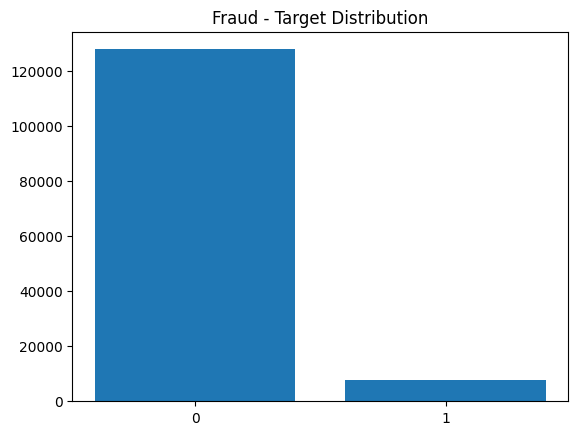

In [14]:
# Visualize fraudulent activities
fraudactivities = client_train.groupby(["target"])["client_id"].count()
plt.bar(x=fraudactivities.index, height=fraudactivities.values, tick_label=[0, 1])
plt.title("Fraud - Target Distribution")
plt.show()

Target is highly imbalanced with fewer cases of fraudulent activities

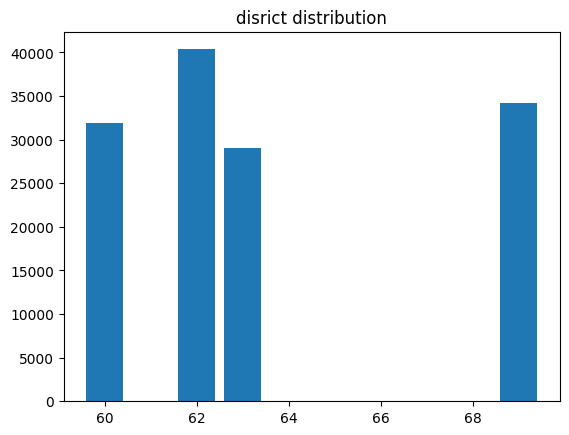

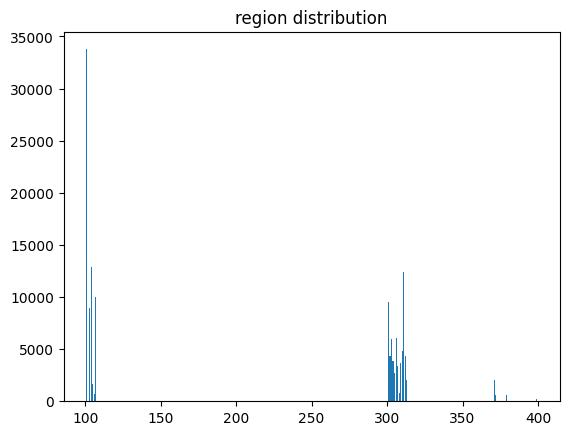

In [15]:
# Visualize client distribution across districts and regions
for col in ["disrict", "region"]:
    region = client_train.groupby([col])["client_id"].count()
    plt.bar(x=region.index, height=region.values)
    plt.title(col + " distribution")
    plt.show()

## Feature Engineering

In [16]:
# convert the column invoice_date to date time format on both the invoice train and invoice test
for df in [invoice_train, invoice_test]:
    df["invoice_date"] = pd.to_datetime(df["invoice_date"])

In [17]:
# encode labels in categorical column
d = {"ELEC": 0, "GAZ": 1}
invoice_train["counter_type"] = invoice_train["counter_type"].map(d)
invoice_test["counter_type"] = invoice_test["counter_type"].map(d)

In [18]:
# convert categorical columns to int for model
client_train["client_catg"] = client_train["client_catg"].astype(int)
client_train["disrict"] = client_train["disrict"].astype(int)

client_test["client_catg"] = client_test["client_catg"].astype(int)
client_test["disrict"] = client_test["disrict"].astype(int)

def aggregate_by_client_id(invoice_data):
    aggs = {}
    aggs['consommation_level_1'] = ['mean']
   aggs['consommation_level_2'] = ['mean']
    aggs['consommation_level_3'] = ['mean']
    aggs['consommation_level_4'] = ['mean']

    agg_trans = invoice_data.groupby(['client_id']).agg(aggs)
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (invoice_data.groupby('client_id')
            .size()
            .reset_index(name='{}transactions_count'.format('1')))
    return pd.merge(df, agg_trans, on='client_id', how='left')

# Agg func Felix
def agg_invoice_num_mode_no_monthly_weighting(
        df_invoice,
        cols_to_agg_num=["consommation_level_1","consommation_level_2",
                          "consommation_level_3","consommation_level_4",
                          "counter_coefficient", "months_number",
                          "invoice_date"
                         ],
        cols_to_agg_mode = ["tarif_type", "counter_statue",
                            "counter_code", "reading_remarque",
                            "counter_type"],
        num_agg = "median"):
    df_num = df_invoice.groupby("client_id")[cols_to_agg_num].agg(num_agg)
    df_mode = df_invoice.groupby("client_id")[cols_to_agg_mode].apply(lambda x: x.mode().iloc[0])
    df_ges = pd.concat([df_num,df_mode], axis=1)
    df_ges.reset_index(inplace=True)
    return df_ges

In [19]:
def agg_invoice_num_mode_monthly_weighting(
    df_invoice,
    cols_to_agg_num=["months_number", "invoice_date", "counter_coefficient"],  #
    cols_to_agg_num_weighted=[
        "consommation_level_1",
        "consommation_level_2",
        "consommation_level_3",
        "consommation_level_4",
    ],
    cols_to_agg_mode=[
        "tarif_type",
        "counter_statue",
        "counter_code",
        "reading_remarque",
        "counter_type",
    ],
    num_agg="mean",
):
    df_num_weighted = df_invoice.groupby("client_id")[
        cols_to_agg_num_weighted + ["months_number"]
    ].sum()
    for col in cols_to_agg_num_weighted:
        df_num_weighted[col] = df_num_weighted[col] / df_num_weighted["months_number"]
    df_num_weighted.drop(columns="months_number", inplace=True)
    df_num = df_invoice.groupby("client_id")[cols_to_agg_num].agg(num_agg)
    df_mode = df_invoice.groupby("client_id")[cols_to_agg_mode].apply(
        lambda x: x.mode().iloc[0]
    )
    df_ges = pd.concat([df_num, df_mode, df_num_weighted], axis=1)
    df_ges.reset_index(inplace=True)
    return df_ges

In [21]:
# group invoice data by client_id
agg_train = agg_invoice_num_mode_monthly_weighting(invoice_train)

In [22]:
print(agg_train.shape)
agg_train.head()

(135493, 13)


,client_id,months_number,invoice_date,counter_coefficient,tarif_type,counter_statue,counter_code,reading_remarque,counter_type,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
0,train_Client_0,4.628571,2011-09-02 18:30:51.428571392,1.0,11.0,0,203.0,6.0,0.0,76.135802,2.283951,0.000000,0.000000
1,train_Client_1,4.324324,2012-03-20 20:45:24.324324352,1.0,11.0,0,203.0,6.0,0.0,128.931250,0.000000,0.000000,0.000000
2,train_Client_10,6.444444,2011-06-11 05:20:00.000000000,1.0,11.0,0,203.0,6.0,0.0,123.922414,5.879310,0.000000,0.000000
3,train_Client_100,4.200000,2009-01-07 18:00:00.000000000,1.0,11.0,0,413.0,6.0,0.0,0.285714,0.000000,0.000000,0.000000
4,train_Client_1000,3.714286,2017-06-04 01:42:51.428571392,1.0,11.0,0,207.0,9.0,0.0,178.692308,28.230769,31.596154,9.884615


In [23]:
# merge aggregate data with client dataset
train = pd.merge(client_train, agg_train, on="client_id", how="left")

In [25]:
# aggregate test set
agg_test = agg_invoice_num_mode_monthly_weighting(invoice_test)
test = pd.merge(client_test, agg_test, on="client_id", how="left")

In [26]:
train.shape, test.shape

((135493, 18), (58069, 17))

In [27]:
# drop redundant columns
sub_client_id = test["client_id"]
drop_columns = ["client_id", "creation_date"]

for col in drop_columns:
    if col in train.columns:
        train.drop([col], axis=1, inplace=True)
    if col in test.columns:
        test.drop([col], axis=1, inplace=True)

In [28]:
train.head()

,disrict,client_catg,region,target,months_number,invoice_date,counter_coefficient,tarif_type,counter_statue,counter_code,reading_remarque,counter_type,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
0,60,11,101,0.0,4.628571,2011-09-02 18:30:51.428571392,1.0,11.0,0,203.0,6.0,0.0,76.135802,2.283951,0.000000,0.000000
1,69,11,107,0.0,4.324324,2012-03-20 20:45:24.324324352,1.0,11.0,0,203.0,6.0,0.0,128.931250,0.000000,0.000000,0.000000
2,62,11,301,0.0,6.444444,2011-06-11 05:20:00.000000000,1.0,11.0,0,203.0,6.0,0.0,123.922414,5.879310,0.000000,0.000000
3,69,11,105,0.0,4.200000,2009-01-07 18:00:00.000000000,1.0,11.0,0,413.0,6.0,0.0,0.285714,0.000000,0.000000,0.000000
4,62,11,303,0.0,3.714286,2017-06-04 01:42:51.428571392,1.0,11.0,0,207.0,9.0,0.0,178.692308,28.230769,31.596154,9.884615


In [29]:
train.describe()

,disrict,client_catg,region,target,months_number,invoice_date,counter_coefficient,tarif_type,counter_code,reading_remarque,counter_type,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
count,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841,33.014595,2012-11-29 22:29:12.407392,1.001692,12.905715,188.150967,7.044489,0.063110,99.792309,34.020823,6.699969,25.705834
min,60.000000,11.000000,101.000000,0.000000,1.000000,1977-06-16 00:00:00,0.888889,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000,4.000000,2012-01-20 10:40:00,1.000000,11.000000,10.000000,6.000000,0.000000,50.000000,0.000000,0.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000,4.200000,2013-03-02 21:10:35.294117632,1.000000,11.000000,203.000000,6.000000,0.000000,83.443182,1.160256,0.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000,4.657143,2015-10-25 11:40:32.432432384,1.000000,11.000000,207.000000,9.000000,0.000000,126.125000,14.736364,0.915966,0.000000
max,69.000000,51.000000,399.000000,1.000000,602244.750000,2019-12-07 00:00:00,50.000000,45.000000,600.000000,413.000000,1.000000,16891.666667,41584.777778,200.000000,69523.707317
std,3.354400,4.423761,104.207044,0.229614,2745.088330,NaN,0.223390,7.346717,131.374081,1.850336,0.243162,148.382286,292.193886,23.206684,378.205840


In [30]:
# remove 0 from consommation_level_1, consommation_level_2, consommation_level_3, consommation_level_4
for col in [
    "consommation_level_1",
    "consommation_level_2",
    "consommation_level_3",
    "consommation_level_4",
]:
    train[col] = train[col].apply(lambda x: x if x > 0 else None)

In [ ]:
# transform consommation_level_1, consommation_level_2, consommation_level_3, consommation_level_4 to log
# for col in ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']:
#    train[col] = train[col].apply(lambda x: np.log(x) if x>0 else None)

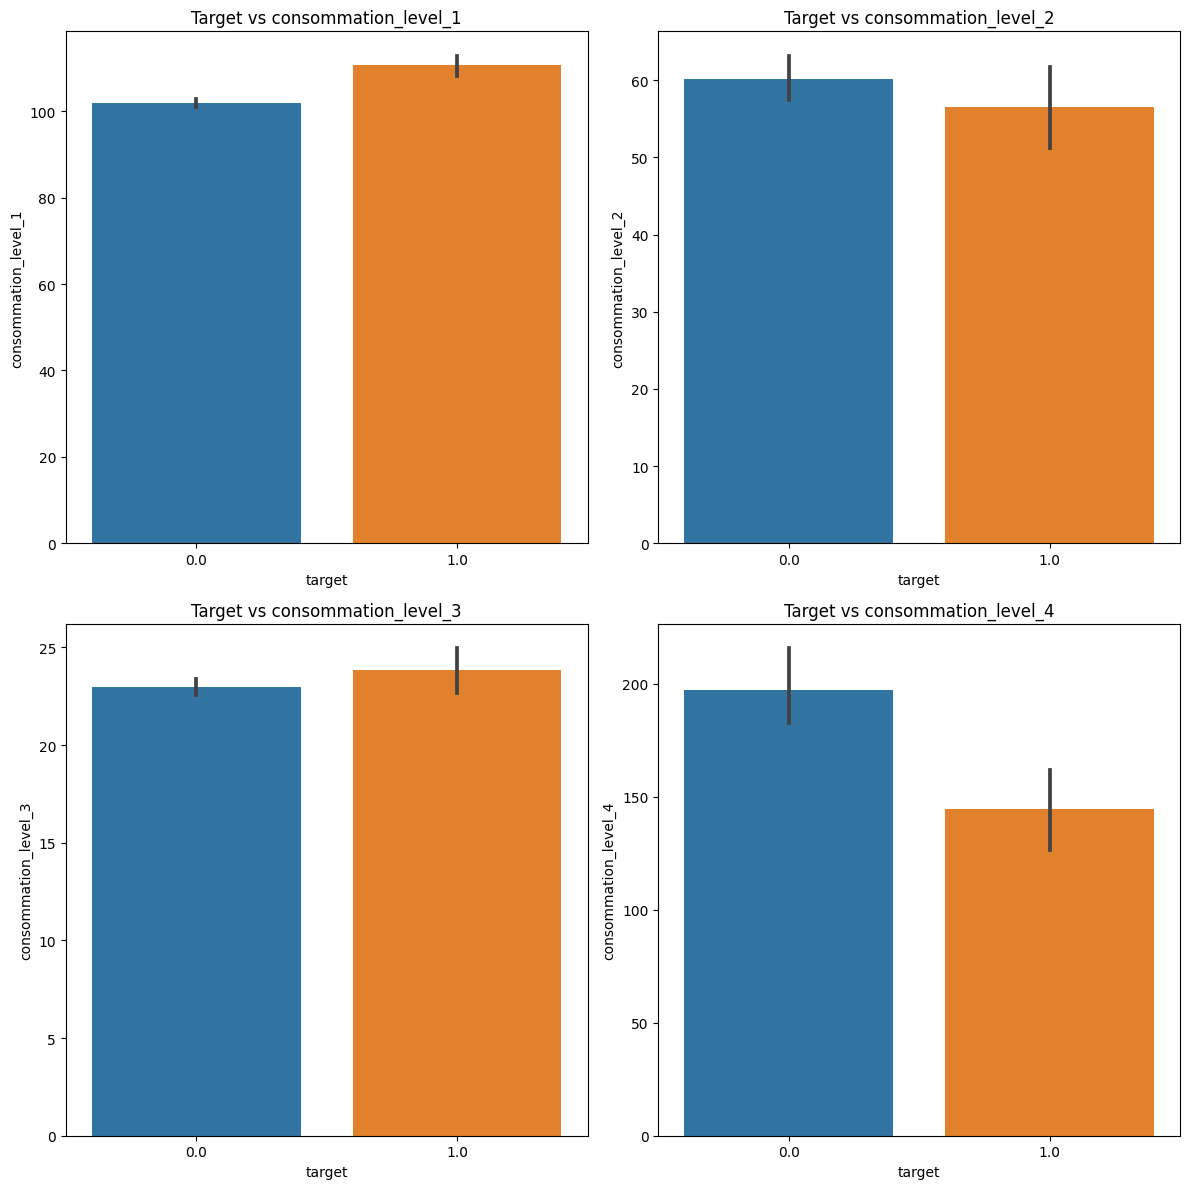

In [31]:
# List of columns
columns = [
    "consommation_level_1",
    "consommation_level_2",
    "consommation_level_3",
    "consommation_level_4",
]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the axes array to simplify indexing
axes = axes.ravel()

# Iterate over columns and axes to create plots
for i, col in enumerate(columns):
    ax = axes[i]
    plt.sca(ax)  # Set the current axes to the current subplot
    sns.barplot(x="target", y=col, data=train)
    plt.title("Target vs " + col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

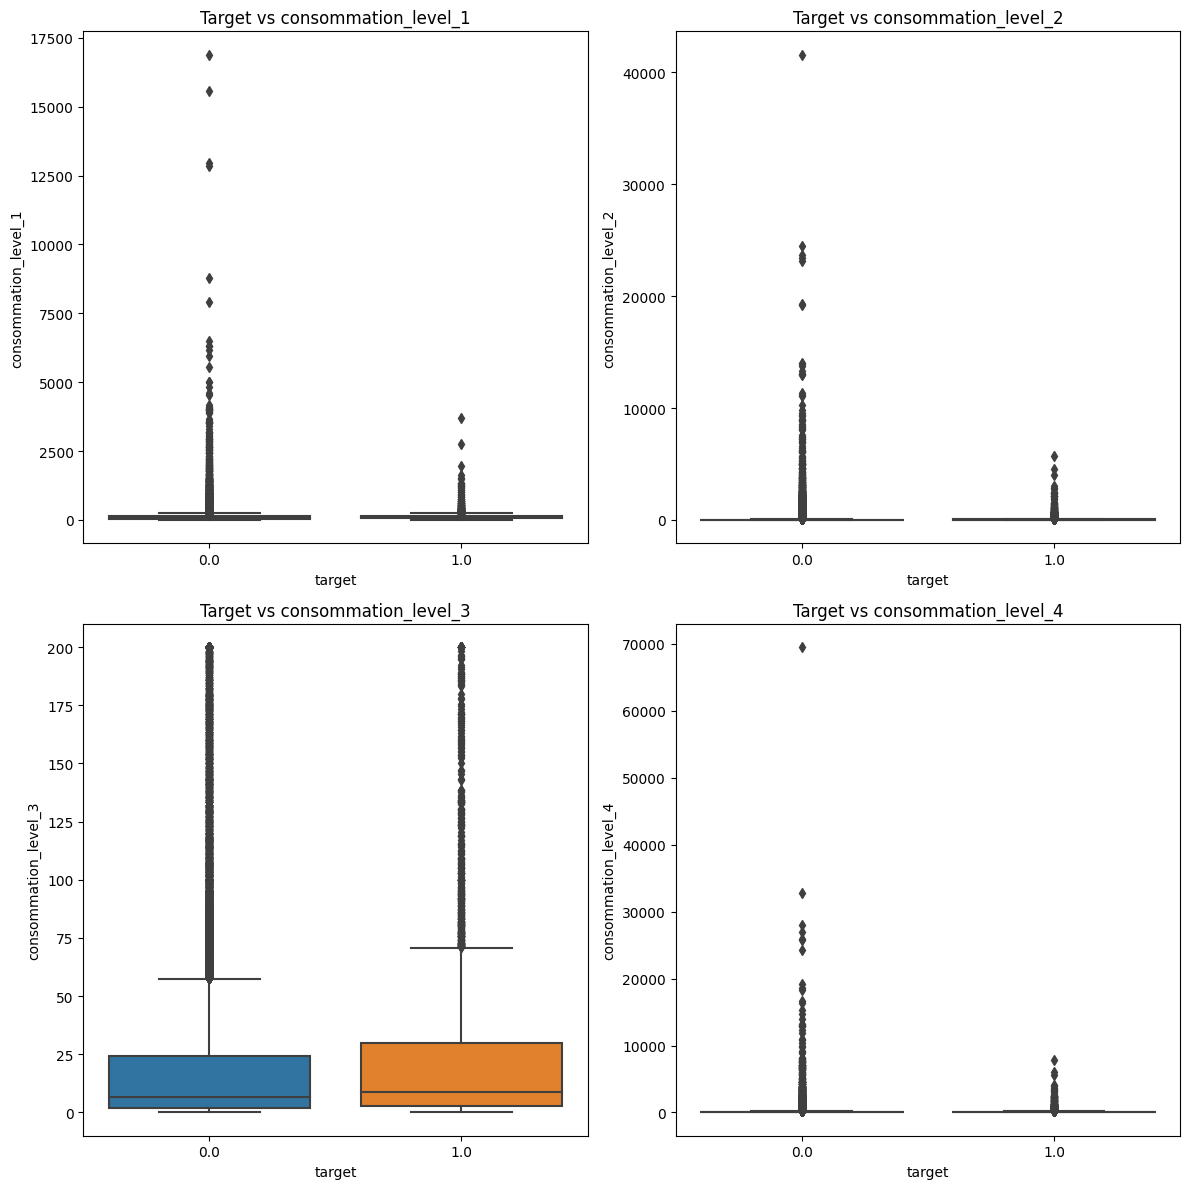

In [32]:
# List of columns
columns = [
    "consommation_level_1",
    "consommation_level_2",
    "consommation_level_3",
    "consommation_level_4",
]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the axes array to simplify indexing
axes = axes.ravel()

# Iterate over columns and axes to create plots
for i, col in enumerate(columns):
    ax = axes[i]
    plt.sca(ax)  # Set the current axes to the current subplot
    sns.boxplot(x="target", y=col, data=train)
    plt.title("Target vs " + col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='counter_type', ylabel='count'>

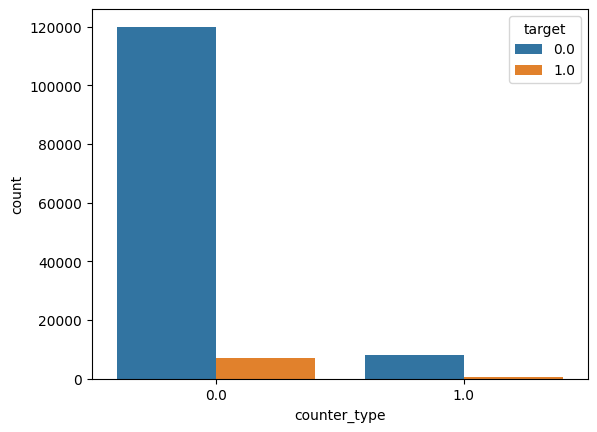

In [33]:
# plot counter type vs target
sns.countplot(x="counter_type", data=train, hue="target")

<Axes: xlabel='counter_type', ylabel='count'>

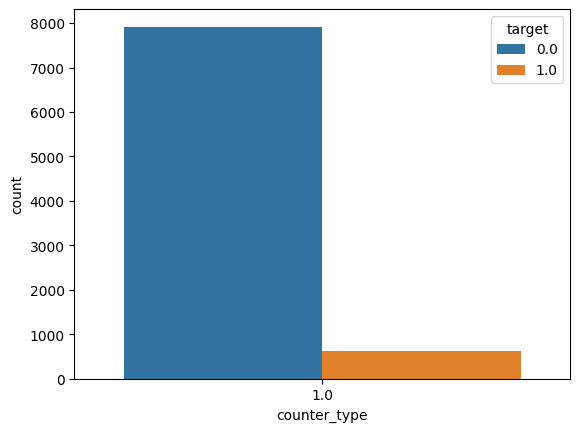

In [34]:
# plot counter type vs target for counter type = 1
sns.countplot(x="counter_type", data=train[train["counter_type"] == 1], hue="target")

<Axes: xlabel='counter_type', ylabel='count'>

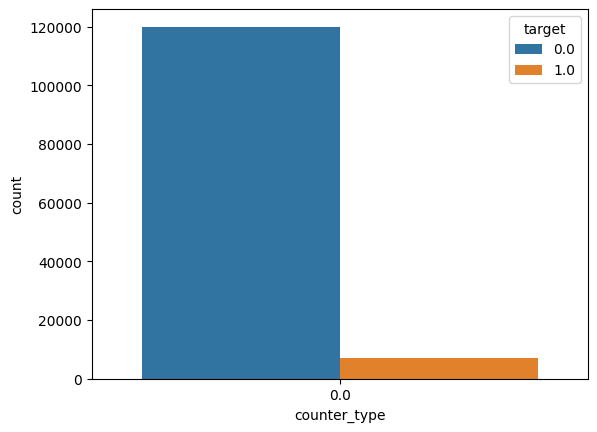

In [35]:
# plot counter type vs target for counter type = 0
sns.countplot(x="counter_type", data=train[train["counter_type"] == 0], hue="target")

In [ ]:
# categorize by # Initial baseline model
# Client catg = 51
# Counter code = 40, 25, 600, (407)
# Counter statue = 0
# Creation date < 2000

# Modelling

## Tips 
- Thorough EDA and incorporating domain knowledge
- Re-grouping categorical features
- More feature engineering(try utilizing some date-time features)
- Target balancing - oversampling, undersampling, SMOTE, scale_pos_weight
- Model ensembling
- Train-test split or cross-validation


# ******************* GOOD LUCK!!! ***************************